In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib widget

from scipy.io import loadmat
import numpy as np
import neurospyke as ns
from scipy.signal import convolve, resample
from scipy.signal.windows import gaussian
from scipy.ndimage import gaussian_filter1d


In [2]:
spike_train = loadmat('./temp/spike_train.mat')
spike_train = spike_train['spike_train'][0][:]

In [3]:
sampling_frequency = 25000
sampling_time = 1 / sampling_frequency

bin_duration = 0.05
bin_samples = int(bin_duration * sampling_frequency)

n_bins = int(np.floor(np.size(spike_train, axis=0) / bin_samples))

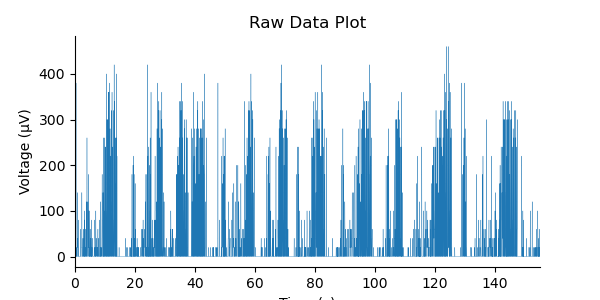

In [4]:
IFR = np.zeros(np.shape(spike_train))

for bin_idx in range(n_bins):
    bin_range = np.arange(bin_idx * bin_samples, bin_idx * bin_samples + bin_samples)
    bin = spike_train[bin_range]
    bin_spike_count = np.sum(bin)
    IFR[bin_range] = bin_spike_count / bin_duration


ns.visualization.plot_raw_data(IFR, sampling_time=sampling_time)

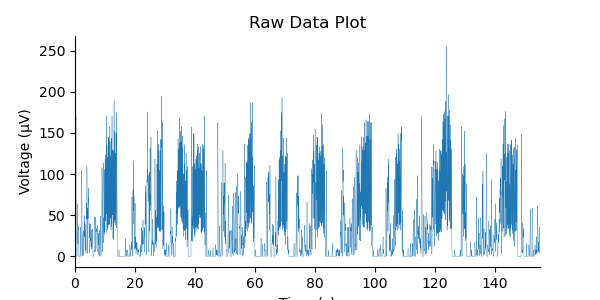

In [5]:
# filter = gaussian(3 * bin_samples, 0.95 * bin_samples)
# ns.visualization.plot_raw_data(filter)
# filtered_IFR = convolve(IFR, filter)
# ns.visualization.plot_raw_data(filtered_IFR, sampling_time=sampling_time)

filtered_IFR = gaussian_filter1d(IFR, 0.95 * bin_samples)
# ns.visualization.plot_raw_data(filtered_IFR, sampling_time=sampling_time)

resampled_IFR = resample(filtered_IFR, int(np.floor(np.size(spike_train, axis=0) / 25)))
ns.visualization.plot_raw_data(resampled_IFR, sampling_time=sampling_time * 25 )